# Iris Dataset 

Using the data from iris dataset using to predict what type of flower it is using Support Vector Machine

In [1]:
import seaborn as sns

In [2]:
iris=sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

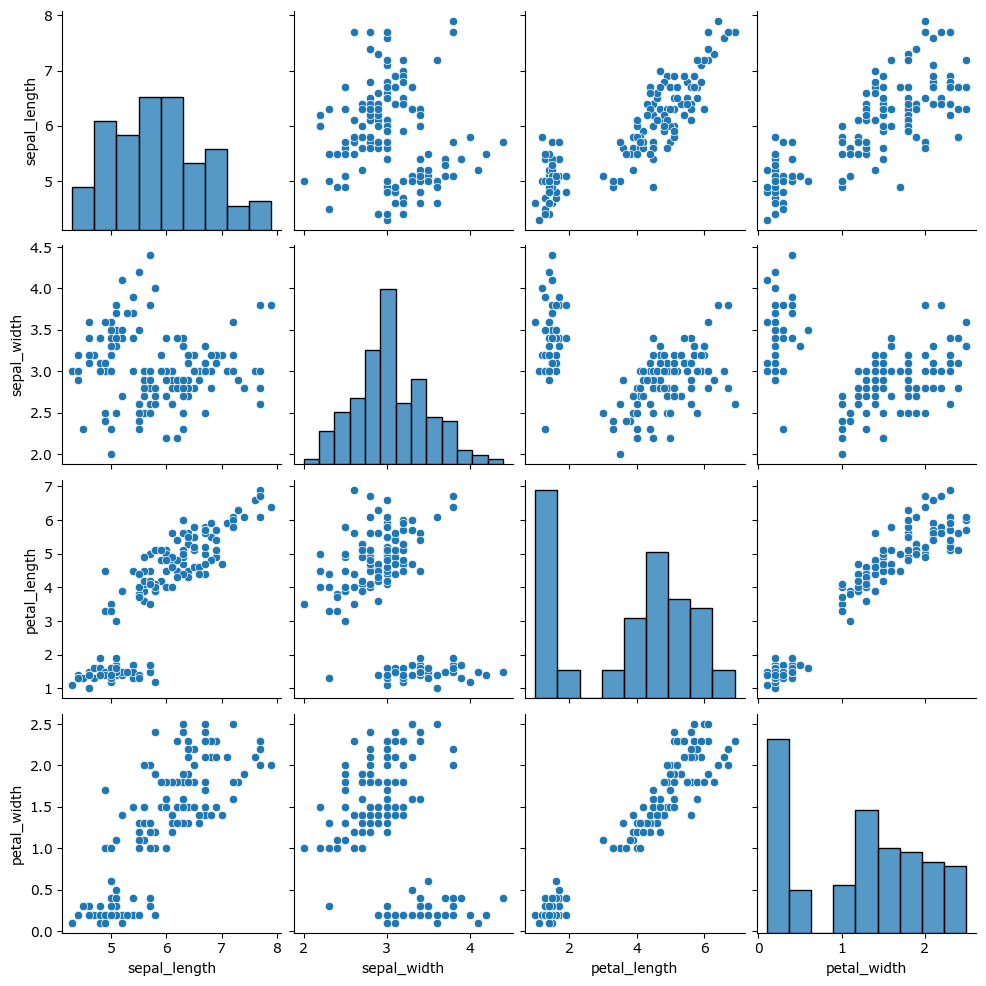

In [5]:
sns.pairplot(data=iris)

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

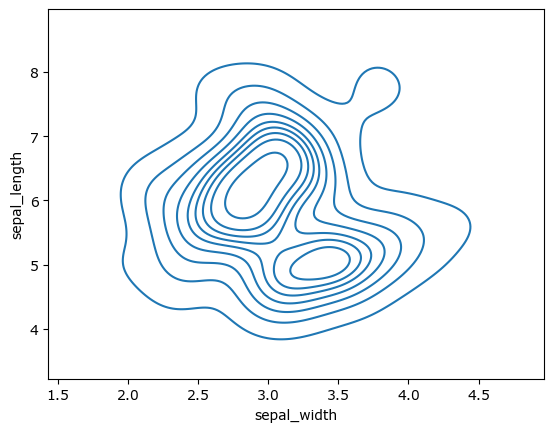

In [7]:
sns.kdeplot(data=iris,x='sepal_width',y='sepal_length')

In [8]:
from sklearn.model_selection import train_test_split 

In [9]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
X=iris.drop('species',axis=1)
y=iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
from sklearn.svm import SVC

In [13]:
model=SVC()

In [14]:
model.fit(X_train,y_train)

SVC()

In [16]:
pred=model.predict(X_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print(confusion_matrix(y_test,pred))

[[15  0  0]
 [ 0 16  2]
 [ 0  1 11]]


In [53]:
print(classification_report(y_test,pred))

[[15  0  0]
 [ 0 13  1]
 [ 0  0 16]]


## Gridsearch

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
param_grid={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}

In [22]:
grid=GridSearchCV(SVC(),param_grid,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [25]:
prediction=grid.predict(X_test)

In [26]:
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[15  0  0]
 [ 0 16  2]
 [ 0  0 12]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.89      0.94        18
   virginica       0.86      1.00      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45

